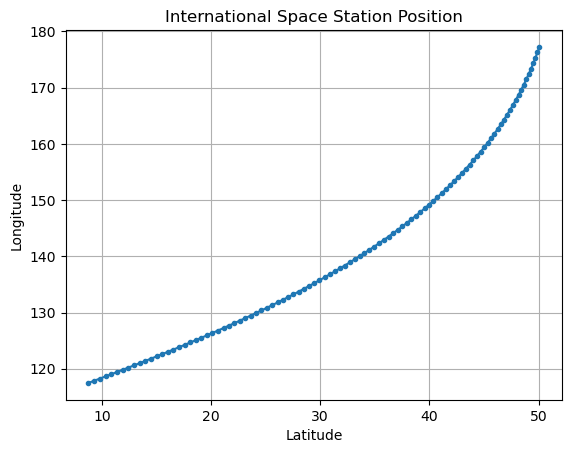

In [6]:
# made with assistance of ChatGPT, specifically:
# how to ping it over a specified time interval
# how to convert the webscraped data from the api into a workable dataframe

import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
import time

url = "http://api.open-notify.org/iss-now.json"

interval = 10 #basically 10 second intervals
count = 0 #starting counter, we want this to reach 100 then break

pos_data = []

while count < 100:
    api_ping = requests.get(url)
    
    if api_ping.status_code == 200:
        iss_tracker = api_ping.json()
        long = float(iss_tracker['iss_position']['longitude'])
        lat = float(iss_tracker['iss_position']['latitude'])
        time_s = iss_tracker['timestamp']
        
        pos_data.append({'Time':time_s, 'Longitude':long, 'Latitude':lat})
        count += 1 
    
    else:
        print('error')
        
    time.sleep(interval)
    
pos_table = pd.DataFrame(pos_data)

plt.plot(pos_table['Latitude'], pos_table['Longitude'], marker = '.')
plt.title('International Space Station Position')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()

In [7]:
pos_table.head(10)

,Time,Longitude,Latitude
0,1689839047,117.4859,8.7604
1,1689839057,117.8741,9.2891
2,1689839068,118.2636,9.8174
3,1689839078,118.6546,10.3450
4,1689839088,119.0282,10.8470
5,1689839099,119.4221,11.3735
6,1689839110,119.8176,11.8993
7,1689839120,120.2148,12.4246
8,1689839131,120.6138,12.9490
9,1689839141,121.0147,13.4728


In [8]:
print(count)

100
